# Project-5  Prediction Of Survival Of Titanic Ship-Sinkage:

# Description:
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives us the information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, We have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

# Imorting all the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Load the Data Set:

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Description:

There are 891 rows and 12 columns in the data set.

Input variales :

1) PassengerId

2) Pclass

3) Name

4) Sex

5) Age

6) Sib Sp

7) Parch

8) Ticket

9) Fare

10) Cabin

11) Embarked

Target variable:

12) Survived(score between survived and dead)

In [4]:
df.shape #data dimension

(891, 12)

In [5]:
df.isnull().sum() #checking for null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Cabin'].unique() #values in cabin column

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

# Converting the Cabin column data into categorical:

In [7]:
chr_cabin=df['Cabin'].astype(str)
newcabin=np.array([cabin[0] for cabin in chr_cabin])
newcabin=pd.Categorical(newcabin)
df['Cabin']=newcabin
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


# Filling the null values of Age column using SimpleImputer:

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
si=SimpleImputer()


column_transform=make_column_transformer((si,['Age']))
imp_df=pd.DataFrame(column_transform.fit_transform(df))
df["Age"]=imp_df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,n,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,n,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,n,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [9]:
df=df.dropna() #Droping all the null value columns
df.isnull().sum() # Checing teh null count

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Describing Data Sets:

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Plotting the histogram graph for the target variable:

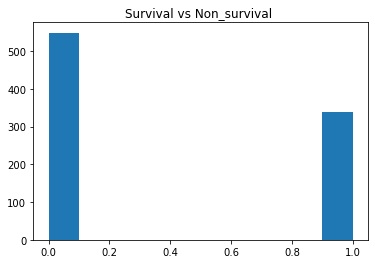

In [11]:
df['Survived'].hist(grid=False)
plt.title('Survival vs Non_survival ')
plt.show()

Here there is no much difference in the count of no.of people survived(1) and no.of people died(0) due to ship sinkage.

So, no need of balancing data.


# Ordinal Encoding:

Here the Sex column in the dataframe is orderly enconded.

In [12]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc=OrdinalEncoder(categories=[['male','female']])
df['Sex']=ord_enc.fit_transform(df[['Sex']])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.000000,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.000000,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",0.0,35.000000,0,0,373450,8.0500,n,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0.0,27.000000,0,0,211536,13.0000,n,S
887,888,1,1,"Graham, Miss. Margaret Edith",1.0,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1.0,29.699118,1,2,W./C. 6607,23.4500,n,S
889,890,1,1,"Behr, Mr. Karl Howell",0.0,26.000000,0,0,111369,30.0000,C,C


# Selecting all the features which are non numeric data and putting them in a list:



In [13]:
features=df.columns.values.tolist()
numerics=['int8','int16','int32','int64','float16','float32','float64']
categorical_columns=[]
for col in features:
    if df[col].dtype in numerics:
        continue
    categorical_columns.append(col)
categorical_columns

['Name', 'Ticket', 'Cabin', 'Embarked']

# Encoded categorical column using Get_Dummies:

Get_Dummies is a method which is imported by pandas 

In [14]:
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=True)
df_dummies.head()

,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)","Name_Adahl, Mr. Mauritz Nils Martin","Name_Adams, Mr. John","Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Aks, Mrs. Sam (Leah Rosen)","Name_Albimona, Mr. Nassef Cassem","Name_Alexander, Mr. William",...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_Q,Embarked_S
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [15]:
df_dummies.shape # data dimension of new dataframe

(889, 1577)

In [16]:
df=df.join(df_dummies) # adding the columns of 'df_dummies' dataframe to orfiginal data 'df'
df.shape

(889, 1589)

In [17]:
df.drop(columns=categorical_columns,axis=1,inplace=True)# dropping all the categorical columns listed columns in the dataframe
df.shape # checking the data dimension

(889, 1585)

# Correlation:

Checkig the correlation of the features with respect to the target:

In [18]:
corr=df.corr()
corr['Survived'].sort_values(ascending=False)

Survived           1.000000
Sex                0.541585
Fare               0.255290
Cabin_B            0.166714
Cabin_D            0.151555
                     ...   
Ticket_CA. 2343   -0.070108
Age               -0.074673
Embarked_S        -0.151777
Cabin_n           -0.313435
Pclass            -0.335549
Name: Survived, Length: 1585, dtype: float64

# Splitting the feature variables with the target variable:

In [62]:
x=df.drop(columns=['Survived'])
y=df['Survived']

# Finding the best Random State:

In [96]:
lr=LogisticRegression()
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print('Best accuracy is: ',maxacc,'Best state is: ',maxrs)

Best accuracy is:  0.8707865168539326 Best state is:  95


# Creating train-test split:

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=95)


# LogisticRegression:

In [98]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('training accuracy is:',accuracy_score(y_train,pred_train)*100)
print('testing accuracy is:',accuracy_score(y_test,pred_test)*100)
print(classification_report(y_test,pred_test))

training accuracy is: 84.24753867791843
testing accuracy is: 87.07865168539325
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       102
           1       0.90      0.79      0.84        76

    accuracy                           0.87       178
   macro avg       0.88      0.86      0.87       178
weighted avg       0.87      0.87      0.87       178



# DecisionTreeClassifier:

In [99]:
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
pred_test=clf1.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8764044943820225
confusion_matrix: 
 [[93  9]
 [13 63]]
classification report:                precision    recall  f1-score   support

           0       0.88      0.91      0.89       102
           1       0.88      0.83      0.85        76

    accuracy                           0.88       178
   macro avg       0.88      0.87      0.87       178
weighted avg       0.88      0.88      0.88       178



# RandomForestClassifier:

In [100]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train,y_train)
pred_test=clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,pred_test))
print('confusion_matrix: \n',confusion_matrix(y_test,pred_test))
print('classification report: ',classification_report(y_test,pred_test))

Accuracy:  0.8539325842696629
confusion_matrix: 
 [[93  9]
 [17 59]]
classification report:                precision    recall  f1-score   support

           0       0.85      0.91      0.88       102
           1       0.87      0.78      0.82        76

    accuracy                           0.85       178
   macro avg       0.86      0.84      0.85       178
weighted avg       0.85      0.85      0.85       178



Logistic Regression, Decision Tree Classifier and Random Forest Classifier are producing good accuracy.

Now we will check cross validation score as well as overfiting if exists

# CrossValidation Score for Logistic Regression:

In [112]:
predict_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,predict_lr)
for i in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print('at cv:-',i)
    print('cv score-',lsc*100)
    print('acc_score-',lss*100)

at cv:- 2
cv score- 77.27857070553699
acc_score- 87.07865168539325
at cv:- 3
cv score- 78.40719507386174
acc_score- 87.07865168539325
at cv:- 4
cv score- 78.96820587403546
acc_score- 87.07865168539325
at cv:- 5
cv score- 78.63010220275504
acc_score- 87.07865168539325
at cv:- 6
cv score- 78.63459096680573
acc_score- 87.07865168539325
at cv:- 7
cv score- 78.17772778402698
acc_score- 87.07865168539325
at cv:- 8
cv score- 78.85698198198199
acc_score- 87.07865168539325
at cv:- 9
cv score- 79.53686525115097
acc_score- 87.07865168539325


Since,cross validation score is almost same.

We are heading with the good approach.

# CrossValidation Score for different Models:

In [114]:
from sklearn.model_selection import cross_val_score
csv=cross_val_score(lr,x,y,cv=4)
print('cross validation score of knn model is:',csv.mean())

csv=cross_val_score(clf1,x,y,cv=4)
print('cross validation score of decision tree model is:',csv.mean())

csv=cross_val_score(clf,x,y,cv=4)
print('cross validation score of Ranom forest classifier model is:',csv.mean())

cross validation score of knn model is: 0.7896820587403547
cross validation score of decision tree model is: 0.7896921585262393
cross validation score of Ranom forest classifier model is: 0.7953581384074657


Random Forest Classifier is performing better among all so we will continue with Random Forest Classifier

# HyperParameterTuning:

In [115]:
from sklearn.model_selection import GridSearchCV
params={    'criterion':['gini','entropy'],
            'max_depth':[10,15],
           }
gri=GridSearchCV(clf,param_grid=params,cv=5,scoring='accuracy')
gri.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15]},
             scoring='accuracy')

In [116]:
print(gri.best_params_)
gri_pred=gri.best_estimator_.predict(x_test)
accuracy_score(y_test,gri_pred)

{'criterion': 'entropy', 'max_depth': 15}


0.7640449438202247

# ROC AUC Plot:

<function matplotlib.pyplot.show(close=None, block=None)>

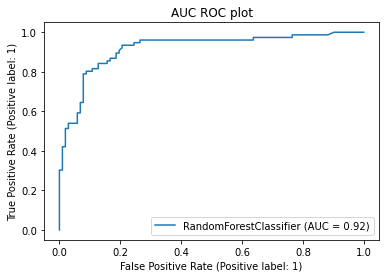

In [117]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gri.best_estimator_,x_test,y_test)
plt.title('AUC ROC plot')
plt.show

# Saving the model:

In [118]:
import pickle
filename='survivalcheck.pkl'
pickle.dump(gri.best_estimator_,open(filename,'wb'))


# Conclusion:

In [119]:
import numpy as np
a=np.array(y_test)
predicted=np.array(gri.best_estimator_.predict(x_test))
df_conclusion=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df_conclusion

,Original,Predicted
0,1,0
1,1,1
2,1,1
3,0,0
4,1,0
...,...,...
173,1,1
174,0,0
175,0,0
176,0,0
